# 问题
用改进的欧拉（Euler）公式求解常微分方程初值问题
## 求解问题
$$\left\{\begin{array}{l}{\frac{d y}{d x}=-y, x \in[0,1]} \\ {y(0)=1}\end{array}\right.$$

# 问题求解

In [1]:
def f(x,y):
    """dy/dt =-y"""
    return -y

## 欧拉方法

In [2]:
def euler(a,b,h,y_0):
    """a,b为求解区间，
       h为步长
       y_0为起点a处的纵坐标"""
    x=[]
    y=[]
    x.append(a)
    y.append(y_0)
    n=int((b-a)/h)    #递推次数
    for i in range(n):
        x.append(round(x[i]+h,1))    #使用round处理精度
        y.append(round(y[i]+h*f(x[i],y[i]),8))
        
    #output
    print("x\ty")
    for i in range(n+1):
        print(str(x[i])+"\t"+str(y[i]))
    
    return y

In [3]:
y=euler(0,1,0.1,1)

x	y
0	1
0.1	0.9
0.2	0.81
0.3	0.729
0.4	0.6561
0.5	0.59049
0.6	0.531441
0.7	0.4782969
0.8	0.43046721
0.9	0.38742049
1.0	0.34867844


## 改进欧拉

In [4]:
def eulerplus(a,b,h,y_0):
    """a,b为求解区间，
       h为步长
       y_0为起点a处的纵坐标"""
    xp=[]
    yp=[]
    xp.append(a)
    yp.append(y_0)
    n=int((b-a)/h)    #递推次数
    for i in range(n):    #循环一次，递推一次
        xp.append(round(xp[i]+h,1))
        yp.append(round(yp[i]+h*f(xp[i],yp[i]),7))  #预测
        yp[i+1]=round(yp[i]+h*(f(xp[i],yp[i])+f(xp[i+1],yp[i+1]))/2,8)    #校正
    #output
    print("x\ty")
    for i in range(n+1):
        print(str(xp[i])+"\t"+str(yp[i]))
        
    return yp

In [5]:
yp=eulerplus(0,1,0.1,1)

x	y
0	1
0.1	0.905
0.2	0.819025
0.3	0.74121762
0.4	0.67080194
0.5	0.60707576
0.6	0.54940356
0.7	0.49721022
0.8	0.44997525
0.9	0.4072276
1.0	0.36854098


## 标准结果
参考[scipy求解微分方程](https://blog.csdn.net/ouening/article/details/80673288),将借助scipy计算的值作为标准结果

In [6]:
from scipy import linspace
from scipy.integrate import odeint
import numpy as np
def solve_first_order_ode():
    """ 求解一阶ODE"""
    xb = linspace(0,1,11)
    y0 = [1] # 为了兼容solve_ivp函数，这里初值要array类型
    
    yb = odeint(f,y0,xb,tfirst=True) # 使用tfirst参数
    print("x\ty")
    for i in range(len(xb)):
        print(str(round(xb[i],1))+"\t"+str(yb[i]))
    
    return yb    
    
   

In [7]:
yb=solve_first_order_ode()

x	y
0.0	[1.]
0.1	[0.90483745]
0.2	[0.81873077]
0.3	[0.7408182]
0.4	[0.67032006]
0.5	[0.60653067]
0.6	[0.54881165]
0.7	[0.49658532]
0.8	[0.44932898]
0.9	[0.40656968]
1.0	[0.36787947]


# 结果分析

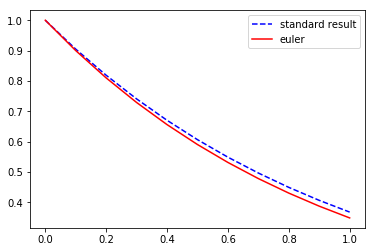

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
x = linspace(0,1,11)
plt.plot(x,yb,'b--',label="standard result")
plt.plot(x,y,'r-',label="euler")    
#plt.plot(x,yp,'g')   
plt.legend()
plt.show()

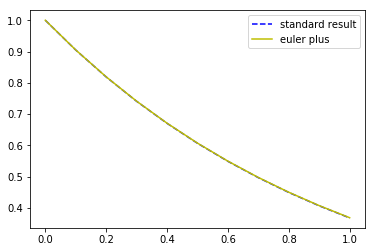

In [9]:
x = linspace(0,1,11)
plt.plot(x,yb,'b--',label="standard result")
plt.plot(x,yp,'y-',label="euler plus") 
plt.legend()
plt.show()